In [26]:
%matplotlib ipympl

from ipywidgets import *

import sys
from time import time
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits.mplot3d import Axes3D, art3d

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

import xml.etree.ElementTree as ET
import h5py

from importlib import reload

sys.path.append('/Users/patrickoare/lqcd/utilities')
# import pytools as pyt
import plottools as pt
import formattools as fmt
pt.set_font()
default_style = fmt.styles['notebook']
default_style['colwidth'] = 15

import GCR
import utils

In [27]:
eval_str = r"""(-0.00458042101,-0.00425715381)
    (0.0155563374,0.0163139717)
   (0.0227101148,-0.0245850913)
    (0.0237016158,0.0347975771)
    (0.024468062,-0.0557278048)
    (0.0250619734,0.0625576782)
    (0.0310401609,0.0759465251)
   (0.0313120955,-0.0754582997)
   (0.0382436953,-0.0922501004)
    (0.0383344984,0.0932776099)
     (0.0456213373,-0.10383732)
     (0.0461240758,0.105647499)
    (0.0511330701,-0.113382981)
     (0.0518332316,0.113517559)
     (0.0570725807,0.126677516)
    (0.0574680108,-0.126033209)
    (0.0612984197,-0.121755518)
      (0.061336531,0.121525182)
      (0.0737596208,0.13530382)
    (0.0739204707,-0.135342802)
     (0.078707282,-0.133098322)
     (0.0790297921,0.133243988)
    (0.0800464451,-0.144918649)
     (0.0803081627,0.144509891)
     (0.085580869,-0.141135195)
      (0.0855969279,0.14114357)
    (0.0880360376,-0.152739458)
     (0.0883641397,0.153735701)
     (0.0964923607,0.159867953)
     (0.0967278453,-0.15968304)
      (0.102766585,0.179501352)
     (0.103062315,-0.179403798)
        (0.104840704,0.1704058)
     (0.104847192,-0.170362324)
     (0.108367397,-0.160292706)
       (0.108429976,0.16034642)
     (0.113097249,-0.175828008)
      (0.113308252,0.175965535)
     (0.125898009,-0.176755518)
      (0.125930053,0.176719559)
      (0.126828154,0.195070658)
       (0.126931766,-0.1947155)
      (0.131609731,0.193075906)
       (0.1316535,-0.193096206)
     (0.135433583,-0.201572968)
      (0.135492696,0.201594137)
      (0.144160793,0.194378744)
     (0.144166811,-0.194514114)
      (0.148764442,0.177317794)
     (0.148776766,-0.177316937)
     (0.149908575,-0.210015016)
       (0.149947312,0.21011044)
     (0.151185966,-0.186336345)
      (0.151186146,0.186395191)
   (0.15607956,-4.32206731e-05)
      (0.158408336,0.212329865)
     (0.158474444,-0.212307442)
      (0.15963983,-0.193303354)
      (0.159654206,0.193306748)
     (0.160052152,-0.030089464)
     (0.160054422,0.0301147209)
     (0.164588715,-0.210830196)
      (0.164611316,0.210836101)
     (0.172444412,-0.227889069)
      (0.172517882,0.227904661)
   (0.172768961,4.33460675e-06)
      (0.173610285,0.203317545)
     (0.173623647,-0.203285563)
     (0.174790128,-0.233996097)
      (0.174858166,0.234019236)
   (0.175711826,3.36383804e-09)
      (0.177944258,0.215984762)
     (0.177948319,-0.215987618)
      (0.178420846,0.204223374)
      (0.17842664,-0.204232347)
       (0.180437943,0.13205752)
     (0.180443587,-0.132052586)
     (0.181041065,-0.192248386)
      (0.181043158,0.192236944)
        (0.18362976,-0.2398537)
      (0.183679696,0.239978619)
     (0.184745412,0.0062312646)
   (0.184745757,-0.00623071517)
   (0.18654283,-1.30969724e-06)
   (0.188341124,6.44099766e-06)
      (0.189414066,0.233521414)
      (0.189493386,-0.23342816)
   (0.191126985,0.000714603652)
     (0.192086838,0.0601781596)
    (0.192095776,-0.0601786882)
  (0.192853213,-0.000345090486)
       (0.195864322,0.22846599)
     (0.195896786,-0.228440319)
   (0.198057749,0.000783182882)
      (0.202666127,0.214255962)
     (0.202668054,-0.214243837)
     (0.203569403,-0.253827492)
      (0.203598443,0.253795431)
      (0.203952973,0.245205987)
     (0.204014172,-0.245237141)
      (0.208809704,0.185739777)
       (0.208813574,-0.1857343)
      (0.209674276,0.199682671)
     (0.209676549,-0.199689217)
     (0.215725272,-0.246581973)
       (0.215775657,0.24655346)
      (0.221397508,0.236497773)
      (0.221892339,-0.23558206)
      (0.224074855,0.258562193)
     (0.224157166,-0.258480867)
"""

In [28]:
def parse_output(estr):
    tokens = [x.strip() for x in estr.split('\n')]
    evals = []
    for token in tokens:
        if token == '': continue
        assert token[0] == '(' and token[-1] == ')', 'Wrong token input'
        token = token[1:-1].split(',')              # token == ['re', 'im']
        evals.append(
            float(token[0]) + 1j*float(token[1])
        )
    return evals
evals = parse_output(eval_str)

In [29]:
evals_12 = parse_output(r"""(0.0227311162,0.018040462)
 (0.0227311162,-0.018040462)
 (0.0247764555,0.0344899704)
(0.0247764555,-0.0344899704)
  (0.0275615404,0.062322103)
 (0.0275615404,-0.062322103)
(0.0313786691,-0.0758821932)
 (0.0313786691,0.0758821932)
(0.0391141868,-0.0932651987)
  (0.0391142037,0.093265175)
  (0.0460833065,0.105615352)
 (0.0460920682,-0.105664685)""")
evals_24 = parse_output(r"""(0.0227311162,0.018040462)
 (0.0227311162,-0.018040462)
(0.0247764555,-0.0344899704)
 (0.0247764555,0.0344899704)
 (0.0275615404,-0.062322103)
  (0.0275615404,0.062322103)
 (0.0313786691,0.0758821932)
(0.0313786691,-0.0758821932)
 (0.0391141975,0.0932651801)
(0.0391141975,-0.0932651801)
 (0.0461070063,-0.105668589)
  (0.0461070063,0.105668589)
  (0.052289077,-0.113419219)
   (0.052289077,0.113419219)
 (0.0575470523,-0.126416846)
  (0.0575470523,0.126416846)
 (0.0612507549,-0.121628672)
   (0.061250755,0.121628672)
 (0.0737715266,-0.135309865)
   (0.074149373,0.135557622)
 (0.0802881961,-0.144373645)
 (0.0886985783,-0.153714879)
    (0.1030066,-0.179423863)
   (0.103006608,0.179424149)""")
evals_32 = parse_output(r"""(0.0227311162,0.018040462)
 (0.0227311162,-0.018040462)
(0.0247764555,-0.0344899704)
 (0.0247764555,0.0344899704)
 (0.0275615404,-0.062322103)
  (0.0275615404,0.062322103)
(0.0313786691,-0.0758821932)
 (0.0313786691,0.0758821932)
 (0.0391141975,0.0932651801)
(0.0391141975,-0.0932651801)
 (0.0461070063,-0.105668589)
  (0.0461070063,0.105668589)
   (0.052289077,0.113419219)
  (0.052289077,-0.113419219)
  (0.0575470523,0.126416846)
 (0.0575470523,-0.126416846)
  (0.0612507549,0.121628672)
 (0.0612507549,-0.121628672)
  (0.0737715229,0.135309859)
 (0.0737715229,-0.135309859)
  (0.0790899754,0.133250567)
 (0.0790899754,-0.133250567)
  (0.0802881689,0.144373666)
 (0.0802881689,-0.144373666)
  (0.0886972899,0.153714107)
 (0.0886972899,-0.153714107)
  (0.0966583626,0.159884213)
 (0.0966583941,-0.159884258)
    (0.1030066,-0.179423863)
     (0.1030066,0.179423863)
   (0.104861978,0.170333431)
  (0.104862644,-0.170331712)""")
evals_100_ice = parse_output(r"""(0.0227311162,-0.018040462)
   (0.0227311162,0.018040462)
 (0.0247764555,-0.0344899704)
  (0.0247764555,0.0344899704)
  (0.0275615404,-0.062322103)
   (0.0275615404,0.062322103)
  (0.0313786691,0.0758821932)
 (0.0313786691,-0.0758821932)
 (0.0391141975,-0.0932651801)
  (0.0391141975,0.0932651801)
   (0.0461070063,0.105668589)
  (0.0461070063,-0.105668589)
   (0.052289077,-0.113419219)
    (0.052289077,0.113419219)
  (0.0575470523,-0.126416846)
   (0.0575470523,0.126416846)
  (0.0612507549,-0.121628672)
   (0.0612507549,0.121628672)
   (0.0737715229,0.135309859)
  (0.0737715229,-0.135309859)
  (0.0790899754,-0.133250567)
   (0.0790899754,0.133250567)
  (0.0802881689,-0.144373666)
   (0.0802881689,0.144373666)
  (0.0856158553,-0.141122334)
   (0.0856158553,0.141122334)
  (0.0886972899,-0.153714107)
   (0.0886972899,0.153714107)
   (0.0966583717,0.159884246)
  (0.0966583717,-0.159884246)
      (0.1030066,0.179423863)
     (0.1030066,-0.179423863)
     (0.1048618,-0.170332564)
      (0.1048618,0.170332564)
   (0.108361095,-0.160300828)
    (0.108361095,0.160300828)
    (0.113233154,0.175914966)
   (0.113233154,-0.175914966)
     (0.12591754,0.176749781)
    (0.12591754,-0.176749781)
    (0.127093149,0.194930666)
   (0.127093149,-0.194930666)
   (0.131617107,-0.193125147)
    (0.131617107,0.193125147)
    (0.135447251,0.201633583)
   (0.135447251,-0.201633583)
    (0.144185298,0.194407244)
   (0.144185298,-0.194407244)
    (0.148773039,0.177319024)
   (0.148773039,-0.177319024)
   (0.149976205,-0.210053789)
    (0.149976205,0.210053789)
   (0.151197081,-0.186392921)
    (0.151197081,0.186392921)
  (0.156090842,4.7808979e-15)
    (0.158467707,0.212306784)
   (0.158467707,-0.212306784)
    (0.159651802,0.193311799)
   (0.159651802,-0.193311799)
  (0.160060007,-0.0301038571)
   (0.160060007,0.0301038571)
    (0.164591039,0.210832474)
   (0.164591039,-0.210832474)
    (0.172542812,0.227880072)
   (0.172542812,-0.227880072)
(0.172768268,-5.27355937e-16)
    (0.173612114,0.203319014)
   (0.173612114,-0.203319014)
    (0.174869625,0.234010254)
   (0.174869625,-0.234010254)
 (0.175712776,7.06379399e-15)
    (0.177952797,0.215979333)
   (0.177952797,-0.215979333)
   (0.178424688,-0.204224462)
    (0.178424688,0.204224462)
    (0.180442665,0.132053532)
   (0.180442665,-0.132053532)
    (0.181038694,0.192239755)
   (0.181038694,-0.192239755)
   (0.183760367,-0.239874054)
    (0.183760367,0.239874054)
 (0.184742746,-0.00622931007)
  (0.184742746,0.00622931012)
(0.186539083,-4.97610013e-08)
(0.188339276,-6.15044693e-07)
    (0.189414236,0.233551957)
   (0.189414236,-0.233551957)
   (0.19078946,0.00105656905)
 (0.190795041,-0.00105383325)
    (0.192091011,0.060181362)
   (0.192091011,-0.060181362)
 (0.192978352,3.93358936e-05)
   (0.195870313,-0.228454384)
    (0.195870313,0.228454384)
(0.196177822,-3.94478095e-05)
  (0.201066522,0.00231668001)
    (0.202671457,0.214249252)
   (0.202671457,-0.214249253)
  (0.203038697,-0.0047111597)
  (0.203381472,0.00547661149)
   (0.203633451,-0.253840066)
    (0.203633451,0.253840066)
   (0.203984596,-0.245176945)
    (0.203984596,0.245176945)
   (0.208809096,-0.185739601)
    (0.208809096,0.185739601)
    (0.209680524,-0.19968313)
    (0.209680594,0.199683141)
    (0.21577044,-0.246584903)
     (0.215770445,0.24658491)""")

In [30]:
evals_conv = evals[:100]
evals_nonconv = evals[100:]

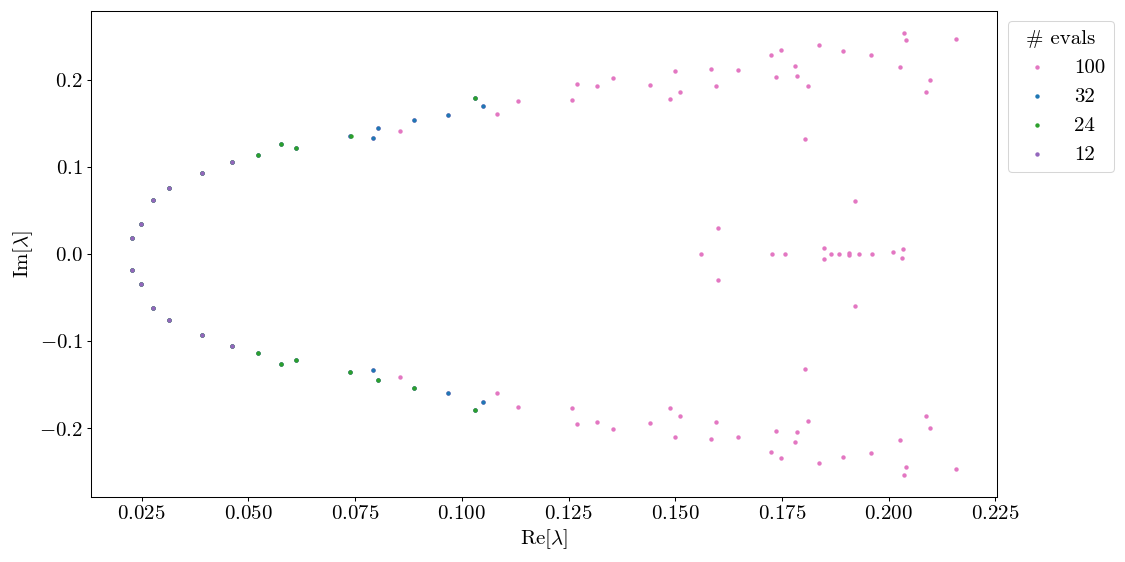

In [31]:
fig, axes = pt.add_subplots()
ax = axes[0]
# pt.scatter_1d(np.real(evals_conv), np.imag(evals_conv), ax = ax, col = pt.pal[3], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '100')
pt.scatter_1d(np.real(evals_100_ice), np.imag(evals_100_ice), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '100')
pt.scatter_1d(np.real(evals_32), np.imag(evals_32), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '32')
pt.scatter_1d(np.real(evals_24), np.imag(evals_24), ax = ax, col = pt.pal[2], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '24')
pt.scatter_1d(np.real(evals_12), np.imag(evals_12), ax = ax, col = pt.pal[4], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '12')
ax.legend(title = r'# evals', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
plt.tight_layout()

## Compare to PETSC
Inputs: 
- Configuration at '/Users/patrickoare/libraries/PETSc-Grid/ckpoint_EODWF_lat.125'.
- Input bulk mass $M_5 = 1.8$.
- Input quark mass $m = 0.001$.

In [32]:
def parse_petsc_output(estr):
    tokens = [x.strip() for x in estr.split('\n')]
    evals = []
    for token in tokens:
        if token == '': continue
        token = token.split(': ')[1]
        token = token.split(' i')[0]
        token = token.split(' + ')
        evals.append(
            float(token[0]) + 1j*float(token[1])
        )
    return evals

In [33]:
# Read PETSc eigenvalues
petsc_evals = parse_petsc_output(r"""Eigenvalue 0: 0.0173369 + 0.0183726 i
Eigenvalue 1: 0.0173369 + -0.0183726 i
Eigenvalue 2: 0.0195401 + 0.0351945 i
Eigenvalue 3: 0.0195401 + -0.0351945 i
Eigenvalue 4: 0.0219907 + -0.0635285 i
Eigenvalue 5: 0.0219907 + 0.0635285 i
Eigenvalue 6: 0.0256686 + 0.0773073 i
Eigenvalue 7: 0.0256686 + -0.0773073 i
Eigenvalue 8: 0.0334382 + -0.0951268 i
Eigenvalue 9: 0.0334382 + 0.0951268 i
Eigenvalue 10: 0.0404668 + -0.10774 i
Eigenvalue 11: 0.0404668 + 0.10774 i
Eigenvalue 12: 0.0467406 + -0.11567 i
Eigenvalue 13: 0.0467406 + 0.11567 i
Eigenvalue 14: 0.0518116 + 0.128804 i
Eigenvalue 15: 0.0518116 + -0.128804 i
Eigenvalue 16: 0.0558523 + -0.124381 i
Eigenvalue 17: 0.0558523 + 0.124381 i
Eigenvalue 18: 0.0681101 + -0.138298 i
Eigenvalue 19: 0.0681101 + 0.138298 i
Eigenvalue 20: 0.0741758 + 0.13641 i
Eigenvalue 21: 0.0741758 + -0.13641 i
Eigenvalue 22: 0.0748435 + 0.147728 i
Eigenvalue 23: 0.0748435 + -0.147728 i
Eigenvalue 24: 0.0808082 + 0.144576 i
Eigenvalue 25: 0.0808082 + -0.144576 i
Eigenvalue 26: 0.0837078 + -0.156852 i
Eigenvalue 27: 0.0837078 + 0.156852 i
Eigenvalue 28: 0.0916343 + 0.16353 i
Eigenvalue 29: 0.0916343 + -0.16353 i
Eigenvalue 30: 0.0972581 + -0.182867 i
Eigenvalue 31: 0.0972581 + 0.182867 i
Eigenvalue 32: 0.0994633 + -0.174345 i
Eigenvalue 33: 0.0994633 + 0.174345 i
Eigenvalue 34: 0.103815 + 0.164675 i
Eigenvalue 35: 0.103815 + -0.164675 i
Eigenvalue 36: 0.1081 + 0.179741 i
Eigenvalue 37: 0.1081 + -0.179741 i
Eigenvalue 38: 0.120976 + 0.180748 i
Eigenvalue 39: 0.120976 + -0.180748 i
Eigenvalue 40: 0.121066 + 0.198676 i
Eigenvalue 41: 0.121066 + -0.198676 i
Eigenvalue 42: 0.12644 + 0.198132 i
Eigenvalue 43: 0.12644 + -0.198132 i
Eigenvalue 44: 0.130062 + 0.205909 i
Eigenvalue 45: 0.130062 + -0.205909 i
Eigenvalue 46: 0.138868 + -0.198037 i
Eigenvalue 47: 0.138868 + 0.198037 i
Eigenvalue 48: 0.144365 + 0.21489 i
Eigenvalue 49: 0.144365 + -0.21489 i
Eigenvalue 50: 0.145023 + -0.182482 i
Eigenvalue 51: 0.145023 + 0.182482 i
Eigenvalue 52: 0.146795 + -0.193735 i
Eigenvalue 53: 0.146795 + 0.193735 i
Eigenvalue 54: 0.15308 + 0.217095 i
Eigenvalue 55: 0.15308 + -0.217095 i
Eigenvalue 56: 0.155682 + 0.197718 i
Eigenvalue 57: 0.155682 + -0.197718 i
Eigenvalue 58: 0.156112 + -7.60307e-11 i
Eigenvalue 59: 0.159851 + -0.216056 i
Eigenvalue 60: 0.159851 + 0.216056 i
Eigenvalue 61: 0.161224 + -0.0300396 i
Eigenvalue 62: 0.161224 + 0.0300396 i
Eigenvalue 63: 0.167349 + -0.232554 i
Eigenvalue 64: 0.167349 + 0.232554 i
Eigenvalue 65: 0.168945 + 0.23919 i
Eigenvalue 66: 0.168945 + -0.23919 i
Eigenvalue 67: 0.169074 + 0.2086 i
Eigenvalue 68: 0.169074 + -0.2086 i
Eigenvalue 69: 0.172714 + 2.61828e-14 i
Eigenvalue 70: 0.172941 + -0.221666 i
Eigenvalue 71: 0.172941 + 0.221666 i
Eigenvalue 72: 0.173815 + -0.21066 i
Eigenvalue 73: 0.173815 + 0.21066 i
Eigenvalue 74: 0.175636 + -4.35791e-11 i
Eigenvalue 75: 0.177769 + -0.24482 i
Eigenvalue 76: 0.177769 + 0.24482 i
Eigenvalue 77: 0.177834 + -0.198191 i
Eigenvalue 78: 0.177834 + 0.198191 i
Eigenvalue 79: 0.180268 + -0.136542 i
Eigenvalue 80: 0.180268 + 0.136542 i
Eigenvalue 81: 0.184523 + -0.239726 i
Eigenvalue 82: 0.184523 + 0.239726 i
Eigenvalue 83: 0.184884 + -0.00610858 i
Eigenvalue 84: 0.184884 + 0.00610858 i
Eigenvalue 85: 0.186316 + 6.73583e-11 i
Eigenvalue 86: 0.188155 + -7.70439e-12 i
Eigenvalue 87: 0.190627 + -0.233133 i
Eigenvalue 88: 0.190627 + 0.233133 i
Eigenvalue 89: 0.190785 + 0.00096053 i
Eigenvalue 90: 0.190785 + -0.00096053 i
Eigenvalue 91: 0.193195 + -1.17841e-10 i
Eigenvalue 92: 0.193801 + 0.0618118 i
Eigenvalue 93: 0.193801 + -0.0618118 i
Eigenvalue 94: 0.195417 + -3.84565e-11 i
Eigenvalue 95: 0.19661 + 6.40006e-12 i
Eigenvalue 96: 0.197968 + -0.2593 i
Eigenvalue 97: 0.197968 + 0.2593 i
Eigenvalue 98: 0.198843 + 0.220164 i
Eigenvalue 99: 0.198843 + -0.220164 i
Eigenvalue 100: 0.198916 + 0.249853 i
Eigenvalue 101: 0.198916 + -0.249853 i""")

# no locking
# petsc_evals = parse_petsc_output(r"""Eigenvalue 0: 0.0173369 + 0.0183726 i
# Eigenvalue 1: 0.0173369 + -0.0183726 i
# Eigenvalue 2: 0.0195401 + 0.0351945 i
# Eigenvalue 3: 0.0195401 + -0.0351945 i
# Eigenvalue 4: 0.0219907 + 0.0635285 i
# Eigenvalue 5: 0.0219907 + -0.0635285 i
# Eigenvalue 6: 0.0256686 + 0.0773073 i
# Eigenvalue 7: 0.0256686 + -0.0773073 i
# Eigenvalue 8: 0.0334382 + -0.0951268 i
# Eigenvalue 9: 0.0334382 + 0.0951268 i
# Eigenvalue 10: 0.0404668 + 0.10774 i
# Eigenvalue 11: 0.0404668 + -0.10774 i
# Eigenvalue 12: 0.0467406 + 0.11567 i
# Eigenvalue 13: 0.0467406 + -0.11567 i
# Eigenvalue 14: 0.0518116 + 0.128804 i
# Eigenvalue 15: 0.0518116 + -0.128804 i
# Eigenvalue 16: 0.0558523 + 0.124381 i
# Eigenvalue 17: 0.0558523 + -0.124381 i
# Eigenvalue 18: 0.0681101 + 0.138298 i
# Eigenvalue 19: 0.0681101 + -0.138298 i
# Eigenvalue 20: 0.0741758 + 0.13641 i
# Eigenvalue 21: 0.0741758 + -0.13641 i
# Eigenvalue 22: 0.0748435 + -0.147728 i
# Eigenvalue 23: 0.0748435 + 0.147728 i
# Eigenvalue 24: 0.0808082 + -0.144576 i
# Eigenvalue 25: 0.0808082 + 0.144576 i
# Eigenvalue 26: 0.0837078 + 0.156852 i
# Eigenvalue 27: 0.0837078 + -0.156852 i
# Eigenvalue 28: 0.0916343 + 0.16353 i
# Eigenvalue 29: 0.0916343 + -0.16353 i
# Eigenvalue 30: 0.0972581 + -0.182867 i
# Eigenvalue 31: 0.0972581 + 0.182867 i
# Eigenvalue 32: 0.0994633 + -0.174345 i
# Eigenvalue 33: 0.0994633 + 0.174345 i
# Eigenvalue 34: 0.103815 + -0.164675 i
# Eigenvalue 35: 0.103815 + 0.164675 i
# Eigenvalue 36: 0.1081 + 0.179741 i
# Eigenvalue 37: 0.1081 + -0.179741 i
# Eigenvalue 38: 0.120976 + 0.180748 i
# Eigenvalue 39: 0.120976 + -0.180748 i
# Eigenvalue 40: 0.121066 + 0.198676 i
# Eigenvalue 41: 0.121066 + -0.198676 i
# Eigenvalue 42: 0.12644 + -0.198132 i
# Eigenvalue 43: 0.12644 + 0.198132 i
# Eigenvalue 44: 0.130062 + -0.205909 i
# Eigenvalue 45: 0.130062 + 0.205909 i
# Eigenvalue 46: 0.138868 + 0.198037 i
# Eigenvalue 47: 0.138868 + -0.198037 i
# Eigenvalue 48: 0.144365 + 0.21489 i
# Eigenvalue 49: 0.144365 + -0.21489 i
# Eigenvalue 50: 0.145023 + 0.182482 i
# Eigenvalue 51: 0.145023 + -0.182482 i
# Eigenvalue 52: 0.146795 + 0.193735 i
# Eigenvalue 53: 0.146795 + -0.193735 i
# Eigenvalue 54: 0.15308 + -0.217095 i
# Eigenvalue 55: 0.15308 + 0.217095 i
# Eigenvalue 56: 0.155682 + 0.197718 i
# Eigenvalue 57: 0.155682 + -0.197718 i
# Eigenvalue 58: 0.156112 + -3.00377e-15 i
# Eigenvalue 59: 0.159851 + 0.216056 i
# Eigenvalue 60: 0.159851 + -0.216056 i
# Eigenvalue 61: 0.161224 + 0.0300396 i
# Eigenvalue 62: 0.161224 + -0.0300396 i
# Eigenvalue 63: 0.167349 + 0.232554 i
# Eigenvalue 64: 0.167349 + -0.232554 i
# Eigenvalue 65: 0.168945 + -0.23919 i
# Eigenvalue 66: 0.168945 + 0.23919 i
# Eigenvalue 67: 0.169074 + -0.2086 i
# Eigenvalue 68: 0.169074 + 0.2086 i
# Eigenvalue 69: 0.172714 + -1.09263e-15 i
# Eigenvalue 70: 0.172941 + 0.221666 i
# Eigenvalue 71: 0.172941 + -0.221666 i
# Eigenvalue 72: 0.173815 + 0.21066 i
# Eigenvalue 73: 0.173815 + -0.21066 i
# Eigenvalue 74: 0.175636 + -1.63955e-16 i
# Eigenvalue 75: 0.177769 + 0.24482 i
# Eigenvalue 76: 0.177769 + -0.24482 i
# Eigenvalue 77: 0.177834 + -0.198191 i
# Eigenvalue 78: 0.177834 + 0.198191 i
# Eigenvalue 79: 0.180268 + 0.136542 i
# Eigenvalue 80: 0.180268 + -0.136542 i
# Eigenvalue 81: 0.184523 + -0.239726 i
# Eigenvalue 82: 0.184523 + 0.239726 i
# Eigenvalue 83: 0.184884 + 0.00610858 i
# Eigenvalue 84: 0.184884 + -0.00610858 i
# Eigenvalue 85: 0.186316 + 1.7368e-15 i
# Eigenvalue 86: 0.188155 + 1.91654e-15 i
# Eigenvalue 87: 0.190627 + 0.233133 i
# Eigenvalue 88: 0.190627 + -0.233133 i
# Eigenvalue 89: 0.190785 + 0.00096053 i
# Eigenvalue 90: 0.190785 + -0.00096053 i
# Eigenvalue 91: 0.193195 + -5.31677e-14 i
# Eigenvalue 92: 0.193801 + 0.0618118 i
# Eigenvalue 93: 0.193801 + -0.0618118 i
# Eigenvalue 94: 0.195417 + 2.13506e-11 i
# Eigenvalue 95: 0.19661 + -8.90688e-11 i
# Eigenvalue 96: 0.197968 + 0.2593 i
# Eigenvalue 97: 0.197968 + -0.2593 i
# Eigenvalue 98: 0.198843 + 0.220164 i
# Eigenvalue 99: 0.198843 + -0.220164 i
# Eigenvalue 100: 0.198916 + -0.249853 i
# Eigenvalue 101: 0.198916 + 0.249853 i""")

In [34]:
# read Grid eigenvalues
grid_evals = utils.read_eval_txt('/Users/patrickoare/lqcd/multigrid/spectra/ckpoint_EODWF_lat.125/Nm200_Nk110_271843/evals.txt')

Eval 0 = (0.0173369-0.0183726j)
Eval 1 = (0.0173369+0.0183726j)
Eval 2 = (0.0195401+0.0351945j)
Eval 3 = (0.0195401-0.0351945j)
Eval 4 = (0.0219907+0.0635285j)
Eval 5 = (0.0219907-0.0635285j)
Eval 6 = (0.0256686+0.0773073j)
Eval 7 = (0.0256686-0.0773073j)
Eval 8 = (0.0334382+0.0951268j)
Eval 9 = (0.0334382-0.0951268j)
Eval 10 = (0.0404668+0.10774j)
Eval 11 = (0.0404668-0.10774j)
Eval 12 = (0.0467406-0.11567j)
Eval 13 = (0.0467406+0.11567j)
Eval 14 = (0.0518116+0.128804j)
Eval 15 = (0.0518116-0.128804j)
Eval 16 = (0.0558523-0.124381j)
Eval 17 = (0.0558523+0.124381j)
Eval 18 = (0.0681101+0.138298j)
Eval 19 = (0.0681101-0.138298j)
Eval 20 = (0.0741758+0.13641j)
Eval 21 = (0.0741758-0.13641j)
Eval 22 = (0.0748435+0.147728j)
Eval 23 = (0.0748435-0.147728j)
Eval 24 = (0.0808082-0.144576j)
Eval 25 = (0.0808082+0.144576j)
Eval 26 = (0.0837078+0.156852j)
Eval 27 = (0.0837078-0.156852j)
Eval 28 = (0.0916343-0.16353j)
Eval 29 = (0.0916343+0.16353j)
Eval 30 = (0.0972581+0.182867j)
Eval 31 = (0.097

In [35]:
grid_evals_102 = parse_output(r"""(0.0173368827,-0.0183726497)
  (0.0173368827,0.0183726497)
 (0.0195401426,-0.0351945016)
  (0.0195401426,0.0351945016)
 (0.0219906854,-0.0635285073)
  (0.0219906854,0.0635285073)
  (0.0256685958,0.0773073406)
 (0.0256685958,-0.0773073406)
 (0.0334382166,-0.0951267586)
  (0.0334382166,0.0951267586)
  (0.0404668455,-0.107740261)
   (0.0404668455,0.107740261)
  (0.0467406165,-0.115669767)
   (0.0467406165,0.115669767)
   (0.0518116492,0.128804493)
  (0.0518116492,-0.128804493)
   (0.055852321,-0.124380653)
    (0.055852321,0.124380653)
    (0.0681101046,0.13829795)
   (0.0681101046,-0.13829795)
  (0.0741758455,-0.136410339)
   (0.0741758455,0.136410339)
  (0.0748435065,-0.147728468)
   (0.0748435065,0.147728468)
  (0.0808081788,-0.144575746)
   (0.0808081788,0.144575746)
  (0.0837077642,-0.156851925)
   (0.0837077642,0.156851925)
  (0.0916342842,-0.163529512)
   (0.0916342842,0.163529512)
   (0.0972580534,0.182867363)
  (0.0972580534,-0.182867363)
  (0.0994633004,-0.174345022)
   (0.0994633004,0.174345022)
    (0.103815244,0.164675339)
   (0.103815244,-0.164675339)
   (0.108099862,-0.179740699)
    (0.108099862,0.179740699)
    (0.120976048,0.180748071)
   (0.120976048,-0.180748071)
     (0.12106596,0.198676274)
    (0.12106596,-0.198676274)
     (0.12643979,0.198131989)
    (0.12643979,-0.198131989)
   (0.130061812,-0.205909297)
    (0.130061812,0.205909297)
   (0.138867683,-0.198037262)
    (0.138867683,0.198037262)
   (0.144365481,-0.214890077)
    (0.144365481,0.214890077)
    (0.145022729,0.182482415)
   (0.145022729,-0.182482415)
     (0.146795256,0.19373543)
    (0.146795256,-0.19373543)
    (0.153080062,0.217094584)
   (0.153080062,-0.217094584)
    (0.155681962,0.197717765)
   (0.155681962,-0.197717765)
(0.156111994,-4.71844785e-16)
    (0.159850695,-0.21605567)
     (0.159850695,0.21605567)
   (0.161224206,0.0300395948)
  (0.161224206,-0.0300395948)
   (0.167349386,-0.232554043)
    (0.167349386,0.232554043)
   (0.168945373,-0.239189767)
    (0.168945373,0.239189767)
    (0.169074006,-0.20859987)
     (0.169074006,0.20859987)
 (0.172714058,2.49800181e-16)
    (0.172940837,0.221666268)
   (0.172940837,-0.221666268)
    (0.173815358,0.210659658)
   (0.173815358,-0.210659658)
 (0.175636484,1.78329573e-15)
   (0.177769086,-0.244819825)
    (0.177769086,0.244819825)
    (0.177834284,0.198190612)
   (0.177834284,-0.198190612)
    (0.180267686,0.136542492)
   (0.180267686,-0.136542492)
   (0.184523097,-0.239725848)
    (0.184523097,0.239725848)
  (0.184884434,0.00610857994)
 (0.184884434,-0.00610857994)
    (0.18631605,5.689893e-16)
(0.188154545,-1.84713356e-14)
    (0.190626802,0.233133238)
   (0.190626802,-0.233133238)
(0.190785461,-0.000960534549)
 (0.190785462,0.000960532993)
   (0.193800596,0.0618117918)
  (0.193800596,-0.0618117918)
    (0.197968218,0.259300079)
   (0.197968218,-0.259300079)
    (0.198843352,0.220163637)
   (0.198843352,-0.220163637)
   (0.198915718,-0.249853011)
    (0.198915718,0.249853011)
   (0.206628072,-0.192915068)""")

In [36]:
style1 = default_style.copy()
style2 = default_style.copy()
style1['markersize'] = 100.0
style2['markersize'] = 20.0

In [37]:
# fig, axes = pt.add_subplots()
# ax = axes[0]
# # pt.scatter_1d(np.real(evals_conv), np.imag(evals_conv), ax = ax, col = pt.pal[3], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = '100')
# pt.scatter_1d(np.real(petsc_evals), np.imag(petsc_evals), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'PETSc', style = style1)
# pt.scatter_1d(np.real(grid_evals), np.imag(grid_evals), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
# pt.scatter_1d(np.real(grid_evals_102), np.imag(grid_evals_102), ax = ax, col = pt.pal[8], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid 100', mkr = '1')
# ax.legend(title = r'Solver', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
# plt.tight_layout()

# # pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/pvdag_m0p001.pdf')

In [38]:
# np.array(petsc_evals)[:100] - np.array(grid_evals)[:100]

### Unpreconditioned DWF operator

In [39]:
fname = '/Users/patrickoare/lqcd/multigrid/spectra/ckpoint_EODWF_lat.125/unprec_Nm200_Nk120_271927/evals.txt'

reload(utils)
unprec_grid_evals = utils.read_eval_txt(fname)
unprec_grid_evals = unprec_grid_evals[:100]

Eval 0 = (0.0034536+1.33786j)
Eval 1 = (0.00345362-1.33786j)
Eval 2 = (0.00356262-1.34813j)
Eval 3 = (0.00356262+1.34813j)
Eval 4 = (0.00448044+1.35333j)
Eval 5 = (0.00448044-1.35333j)
Eval 6 = (-0.00533945-1.33622j)
Eval 7 = (-0.00533945+1.33622j)
Eval 8 = (-0.00589799-1.35993j)
Eval 9 = (-0.00589799+1.35993j)
Eval 10 = (0.00620576+1.36309j)
Eval 11 = (0.00620576-1.36309j)
Eval 12 = (-0.00669561-1.3498j)
Eval 13 = (-0.00669561+1.3498j)
Eval 14 = (0.00833884-1.36522j)
Eval 15 = (0.00833884+1.36522j)
Eval 16 = (-0.00871191+1.33762j)
Eval 17 = (-0.00871191-1.33762j)
Eval 18 = (0.0117998+1.35191j)
Eval 19 = (0.0117998-1.35191j)
Eval 20 = (0.0137608+1.32294j)
Eval 21 = (0.01386+1.35998j)
Eval 22 = (0.01386-1.35998j)
Eval 23 = (0.0142759+1.34521j)
Eval 24 = (0.0142759-1.34521j)
Eval 25 = (-0.015001-1.35614j)
Eval 26 = (-0.015001+1.35614j)
Eval 27 = (-0.0173109+1.34412j)
Eval 28 = (-0.0173109-1.34412j)
Eval 29 = (0.0198647-1.35485j)
Eval 30 = (0.0198647+1.35485j)
Eval 31 = (-0.0201485+1.3333

In [40]:
unprec_petsc = parse_petsc_output(r"""Eigenvalue 0: -0.746866 + 0.58799 i
Eigenvalue 1: -0.746866 + -0.58799 i
Eigenvalue 2: -0.732895 + -0.525345 i
Eigenvalue 3: -0.732895 + 0.525345 i
Eigenvalue 4: -0.732018 + -0.571629 i
Eigenvalue 5: -0.732018 + 0.571629 i
Eigenvalue 6: -0.727801 + 0.589395 i
Eigenvalue 7: -0.727801 + -0.589395 i
Eigenvalue 8: -0.715105 + 0.68552 i
Eigenvalue 9: -0.715105 + -0.68552 i
Eigenvalue 10: -0.714113 + 0.669326 i
Eigenvalue 11: -0.714113 + -0.669326 i
Eigenvalue 12: -0.713019 + -0.60958 i
Eigenvalue 13: -0.713019 + 0.60958 i
Eigenvalue 14: -0.706521 + -0.51115 i
Eigenvalue 15: -0.706521 + 0.51115 i
Eigenvalue 16: -0.704933 + 0.717184 i
Eigenvalue 17: -0.704933 + -0.717184 i
Eigenvalue 18: -0.704472 + -0.59556 i
Eigenvalue 19: -0.704472 + 0.59556 i
Eigenvalue 20: -0.703932 + 0.654464 i
Eigenvalue 21: -0.703932 + -0.654464 i
Eigenvalue 22: -0.701325 + 0.536261 i
Eigenvalue 23: -0.701325 + -0.536261 i
Eigenvalue 24: -0.69739 + -0.635893 i
Eigenvalue 25: -0.69739 + 0.635893 i
Eigenvalue 26: -0.692829 + 0.559575 i
Eigenvalue 27: -0.692829 + -0.559575 i
Eigenvalue 28: -0.691036 + -0.696135 i
Eigenvalue 29: -0.691036 + 0.696135 i
Eigenvalue 30: -0.687518 + -0.466304 i
Eigenvalue 31: -0.687518 + 0.466304 i
Eigenvalue 32: -0.685934 + -0.739467 i
Eigenvalue 33: -0.685934 + 0.739467 i
Eigenvalue 34: -0.685164 + -0.671208 i
Eigenvalue 35: -0.685164 + 0.671208 i
Eigenvalue 36: -0.677763 + 0.761699 i
Eigenvalue 37: -0.677763 + -0.761699 i
Eigenvalue 38: -0.675355 + -0.623213 i
Eigenvalue 39: -0.675355 + 0.623213 i
Eigenvalue 40: -0.674605 + -0.566108 i
Eigenvalue 41: -0.674605 + 0.566108 i
Eigenvalue 42: -0.667464 + 0.755461 i
Eigenvalue 43: -0.667464 + -0.755461 i
Eigenvalue 44: -0.667376 + -0.70982 i
Eigenvalue 45: -0.667376 + 0.70982 i
Eigenvalue 46: -0.667271 + 0.784047 i
Eigenvalue 47: -0.667271 + -0.784047 i
Eigenvalue 48: -0.66561 + 0.598995 i
Eigenvalue 49: -0.66561 + -0.598995 i
Eigenvalue 50: -0.664956 + 0.512073 i
Eigenvalue 51: -0.664956 + -0.512073 i
Eigenvalue 52: -0.664915 + -0.692061 i
Eigenvalue 53: -0.664915 + 0.692061 i
Eigenvalue 54: -0.663163 + -0.444651 i
Eigenvalue 55: -0.663163 + 0.444651 i
Eigenvalue 56: -0.66132 + -0.577336 i
Eigenvalue 57: -0.66132 + 0.577336 i
Eigenvalue 58: -0.660446 + -0.522693 i
Eigenvalue 59: -0.660446 + 0.522693 i
Eigenvalue 60: -0.658851 + 0.819196 i
Eigenvalue 61: -0.658851 + -0.819196 i
Eigenvalue 62: -0.656237 + 0.446173 i
Eigenvalue 63: -0.656237 + -0.446173 i
Eigenvalue 64: -0.656209 + -0.806426 i
Eigenvalue 65: -0.656209 + 0.806426 i
Eigenvalue 66: -0.656195 + -0.643925 i
Eigenvalue 67: -0.656195 + 0.643925 i
Eigenvalue 68: -0.65573 + -0.858316 i
Eigenvalue 69: -0.65573 + 0.858316 i
Eigenvalue 70: -0.654251 + -0.666727 i
Eigenvalue 71: -0.654251 + 0.666727 i
Eigenvalue 72: -0.652995 + -0.543081 i
Eigenvalue 73: -0.652995 + 0.543081 i
Eigenvalue 74: -0.652649 + 0.789653 i
Eigenvalue 75: -0.652649 + -0.789653 i
Eigenvalue 76: -0.652408 + -0.730433 i
Eigenvalue 77: -0.652408 + 0.730433 i
Eigenvalue 78: -0.652255 + 0.709689 i
Eigenvalue 79: -0.652255 + -0.709689 i
Eigenvalue 80: -0.649819 + 0.675172 i
Eigenvalue 81: -0.649819 + -0.675172 i
Eigenvalue 82: -0.648115 + 0.745237 i
Eigenvalue 83: -0.648115 + -0.745237 i
Eigenvalue 84: -0.647233 + -0.632325 i
Eigenvalue 85: -0.647233 + 0.632325 i
Eigenvalue 86: -0.646089 + 0.812667 i
Eigenvalue 87: -0.646089 + -0.812667 i
Eigenvalue 88: -0.644969 + -0.83006 i
Eigenvalue 89: -0.644969 + 0.83006 i
Eigenvalue 90: -0.641668 + 0.770157 i
Eigenvalue 91: -0.641668 + -0.770157 i
Eigenvalue 92: -0.64154 + 0.665887 i
Eigenvalue 93: -0.64154 + -0.665887 i
Eigenvalue 94: -0.640249 + -0.603071 i
Eigenvalue 95: -0.640249 + 0.603071 i
Eigenvalue 96: -0.6376 + -0.861401 i
Eigenvalue 97: -0.6376 + 0.861401 i
Eigenvalue 98: -0.634833 + -0.83729 i
Eigenvalue 99: -0.634833 + 0.83729 i""")

In [41]:
grid_high = parse_output(r"""(7.14686583,0.587990214)
(7.14686583,-0.587990214)
  (7.11510531,0.68552046)
(7.11510531,-0.685520458)
(7.10493265,-0.717184481)
 (7.10493264,0.717184481)
(7.05736855,-0.819807041)
(7.05572996,-0.858316173)
 (7.05572996,0.858316173)
  (7.05450699,0.81676118)
 (7.02873519,0.887541428)
(7.02873519,-0.887541428)""")
petsc_high = parse_petsc_output(r"""Eigenvalue 0: 7.14687 + -0.58799 i
Eigenvalue 1: 7.14687 + 0.58799 i
Eigenvalue 2: 7.13289 + -0.525345 i
Eigenvalue 3: 7.13289 + 0.525345 i
Eigenvalue 4: 7.13202 + 0.571629 i
Eigenvalue 5: 7.13202 + -0.571629 i
Eigenvalue 6: 7.1278 + -0.589395 i
Eigenvalue 7: 7.1278 + 0.589395 i
Eigenvalue 8: 7.11511 + -0.68552 i
Eigenvalue 9: 7.11511 + 0.68552 i
Eigenvalue 10: 7.11411 + 0.669326 i
Eigenvalue 11: 7.11411 + -0.669326 i
Eigenvalue 12: 7.11302 + -0.60958 i
Eigenvalue 13: 7.11302 + 0.60958 i
Eigenvalue 14: 7.10652 + 0.51115 i
Eigenvalue 15: 7.10652 + -0.51115 i
Eigenvalue 16: 7.10493 + 0.717184 i
Eigenvalue 17: 7.10493 + -0.717184 i
Eigenvalue 18: 7.10447 + -0.59556 i
Eigenvalue 19: 7.10447 + 0.59556 i
Eigenvalue 20: 7.10393 + -0.654464 i
Eigenvalue 21: 7.10393 + 0.654464 i
Eigenvalue 22: 7.10133 + -0.536261 i
Eigenvalue 23: 7.10133 + 0.536261 i
Eigenvalue 24: 7.09739 + -0.635893 i
Eigenvalue 25: 7.09739 + 0.635893 i
Eigenvalue 26: 7.09283 + -0.559575 i
Eigenvalue 27: 7.09283 + 0.559575 i
Eigenvalue 28: 7.09104 + 0.696135 i
Eigenvalue 29: 7.09104 + -0.696135 i
Eigenvalue 30: 7.08752 + 0.466304 i
Eigenvalue 31: 7.08752 + -0.466304 i
Eigenvalue 32: 7.08593 + -0.739467 i
Eigenvalue 33: 7.08593 + 0.739467 i
Eigenvalue 34: 7.08516 + -0.671208 i
Eigenvalue 35: 7.08516 + 0.671208 i
Eigenvalue 36: 7.07776 + -0.761699 i
Eigenvalue 37: 7.07776 + 0.761699 i
Eigenvalue 38: 7.07536 + 0.623213 i
Eigenvalue 39: 7.07536 + -0.623213 i
Eigenvalue 40: 7.07461 + 0.566108 i
Eigenvalue 41: 7.07461 + -0.566108 i
Eigenvalue 42: 7.06746 + 0.755461 i
Eigenvalue 43: 7.06746 + -0.755461 i
Eigenvalue 44: 7.06738 + 0.70982 i
Eigenvalue 45: 7.06738 + -0.70982 i
Eigenvalue 46: 7.06727 + 0.784047 i
Eigenvalue 47: 7.06727 + -0.784047 i
Eigenvalue 48: 7.06561 + 0.598995 i
Eigenvalue 49: 7.06561 + -0.598995 i
Eigenvalue 50: 7.06496 + -0.512073 i
Eigenvalue 51: 7.06496 + 0.512073 i
Eigenvalue 52: 7.06492 + 0.692061 i
Eigenvalue 53: 7.06492 + -0.692061 i
Eigenvalue 54: 7.06316 + -0.444651 i
Eigenvalue 55: 7.06316 + 0.444651 i
Eigenvalue 56: 7.06132 + -0.577336 i
Eigenvalue 57: 7.06132 + 0.577336 i
Eigenvalue 58: 7.06045 + 0.522693 i
Eigenvalue 59: 7.06045 + -0.522693 i
Eigenvalue 60: 7.05885 + -0.819196 i
Eigenvalue 61: 7.05885 + 0.819196 i
Eigenvalue 62: 7.05624 + -0.446173 i
Eigenvalue 63: 7.05624 + 0.446173 i
Eigenvalue 64: 7.05621 + 0.806426 i
Eigenvalue 65: 7.05621 + -0.806426 i
Eigenvalue 66: 7.0562 + 0.643925 i
Eigenvalue 67: 7.0562 + -0.643925 i
Eigenvalue 68: 7.05573 + 0.858316 i
Eigenvalue 69: 7.05573 + -0.858316 i
Eigenvalue 70: 7.05425 + -0.666727 i
Eigenvalue 71: 7.05425 + 0.666727 i
Eigenvalue 72: 7.053 + 0.543081 i
Eigenvalue 73: 7.053 + -0.543081 i
Eigenvalue 74: 7.05265 + -0.789653 i
Eigenvalue 75: 7.05265 + 0.789653 i
Eigenvalue 76: 7.05241 + -0.730433 i
Eigenvalue 77: 7.05241 + 0.730433 i
Eigenvalue 78: 7.05226 + 0.709689 i
Eigenvalue 79: 7.05226 + -0.709689 i
Eigenvalue 80: 7.04982 + 0.675172 i
Eigenvalue 81: 7.04982 + -0.675172 i
Eigenvalue 82: 7.04812 + 0.745237 i
Eigenvalue 83: 7.04812 + -0.745237 i
Eigenvalue 84: 7.04723 + 0.632325 i
Eigenvalue 85: 7.04723 + -0.632325 i
Eigenvalue 86: 7.04609 + -0.812667 i
Eigenvalue 87: 7.04609 + 0.812667 i
Eigenvalue 88: 7.04497 + 0.83006 i
Eigenvalue 89: 7.04497 + -0.83006 i
Eigenvalue 90: 7.04167 + 0.770157 i
Eigenvalue 91: 7.04167 + -0.770157 i
Eigenvalue 92: 7.04154 + 0.665887 i
Eigenvalue 93: 7.04154 + -0.665887 i
Eigenvalue 94: 7.04025 + -0.603071 i
Eigenvalue 95: 7.04025 + 0.603071 i
Eigenvalue 96: 7.0376 + -0.861401 i
Eigenvalue 97: 7.0376 + 0.861401 i
Eigenvalue 98: 7.03483 + -0.83729 i
Eigenvalue 99: 7.03483 + 0.83729 i""")

In [42]:
# grid_low = parse_output(r"""(-0.746865834,0.587990214)
# (-0.746865834,-0.587990214)
#  (-0.715105306,0.685520458)
# (-0.715105306,-0.685520457)
#  (-0.713984499,0.669388498)
# (-0.704932644,-0.717184481)
#  (-0.704932644,0.717184481)
#  (-0.658999152,-0.81334683)
# (-0.655729958,-0.858316173)
#  (-0.655729958,0.858316173)
# (-0.628735189,-0.887541426)
#  (-0.628735186,0.887541424)""")
grid_low = parse_output(r"""(-0.746865834,-0.587990214)
 (-0.746865834,0.587990214)
(-0.732894763,-0.525345191)
 (-0.732894763,0.525345191)
(-0.732017514,-0.571628868)
 (-0.732017514,0.571628868)
  (-0.727801351,0.58939516)
 (-0.727801351,-0.58939516)
(-0.715105306,-0.685520458)
 (-0.715105306,0.685520458)
(-0.714112687,-0.669325766)
 (-0.714112687,0.669325766)
 (-0.713018869,0.609579896)
(-0.713018869,-0.609579896)
(-0.706521475,-0.511150277)
 (-0.706521475,0.511150277)
(-0.704932644,-0.717184481)
 (-0.704932644,0.717184481)
 (-0.703932283,0.654463844)
 (-0.701325469,0.536261049)
(-0.701325469,-0.536261049)
(-0.687517674,-0.466304439)
 (-0.687517674,0.466304439)
(-0.685996662,-0.739456414)
 (-0.685934305,0.739466962)
 (-0.677762785,0.761699476)
(-0.663162967,-0.444650769)
 (-0.663162967,0.444650769)
 (-0.658850634,0.819195733)
(-0.658850571,-0.819195723)
 (-0.655729958,0.858316173)
(-0.655729958,-0.858316173)""")

In [43]:
reload(utils)
grid_low, ritz_low = utils.read_eval_txt(r'/Users/patrickoare/lqcd/multigrid/spectra/ckpoint_EODWF_lat.125/unprec_Nm200_Nk120_273494/evals.txt')

Eval 0 = (-0.746866-0.58799j), ritz estimate = 7.44677e-15
Eval 1 = (-0.746866+0.58799j), ritz estimate = 1.89329e-15
Eval 2 = (-0.732895+0.525345j), ritz estimate = 2.5674e-15
Eval 3 = (-0.732895-0.525345j), ritz estimate = 6.92029e-15
Eval 4 = (-0.732018-0.571629j), ritz estimate = 7.54073e-16
Eval 5 = (-0.732018+0.571629j), ritz estimate = 3.21964e-15
Eval 6 = (-0.727801+0.589395j), ritz estimate = 5.21238e-16
Eval 7 = (-0.727801-0.589395j), ritz estimate = 1.5324e-15
Eval 8 = (-0.715105-0.68552j), ritz estimate = 1.18389e-15
Eval 9 = (-0.715105+0.68552j), ritz estimate = 4.5002e-16
Eval 10 = (-0.714113-0.669326j), ritz estimate = 3.87474e-16
Eval 11 = (-0.714113+0.669326j), ritz estimate = 6.99644e-16
Eval 12 = (-0.713019+0.60958j), ritz estimate = 2.2133e-16
Eval 13 = (-0.713019-0.60958j), ritz estimate = 8.53045e-16
Eval 14 = (-0.706521-0.51115j), ritz estimate = 6.23338e-05
Eval 15 = (-0.706521+0.51115j), ritz estimate = 7.65387e-15
Eval 16 = (-0.704933-0.717184j), ritz estimate

In [44]:
filtered = grid_low[np.real(grid_low) <= np.max(np.real(unprec_petsc))]
ritz_filtered = ritz_low[np.real(grid_low) <= np.max(np.real(unprec_petsc))]

In [45]:
unprec_petsc

[(-0.746866+0.58799j),
 (-0.746866-0.58799j),
 (-0.732895-0.525345j),
 (-0.732895+0.525345j),
 (-0.732018-0.571629j),
 (-0.732018+0.571629j),
 (-0.727801+0.589395j),
 (-0.727801-0.589395j),
 (-0.715105+0.68552j),
 (-0.715105-0.68552j),
 (-0.714113+0.669326j),
 (-0.714113-0.669326j),
 (-0.713019-0.60958j),
 (-0.713019+0.60958j),
 (-0.706521-0.51115j),
 (-0.706521+0.51115j),
 (-0.704933+0.717184j),
 (-0.704933-0.717184j),
 (-0.704472-0.59556j),
 (-0.704472+0.59556j),
 (-0.703932+0.654464j),
 (-0.703932-0.654464j),
 (-0.701325+0.536261j),
 (-0.701325-0.536261j),
 (-0.69739-0.635893j),
 (-0.69739+0.635893j),
 (-0.692829+0.559575j),
 (-0.692829-0.559575j),
 (-0.691036-0.696135j),
 (-0.691036+0.696135j),
 (-0.687518-0.466304j),
 (-0.687518+0.466304j),
 (-0.685934-0.739467j),
 (-0.685934+0.739467j),
 (-0.685164-0.671208j),
 (-0.685164+0.671208j),
 (-0.677763+0.761699j),
 (-0.677763-0.761699j),
 (-0.675355-0.623213j),
 (-0.675355+0.623213j),
 (-0.674605-0.566108j),
 (-0.674605+0.566108j),
 (-0

In [46]:
filtered

array([-0.746866-0.58799j , -0.746866+0.58799j , -0.732895+0.525345j,
       -0.732895-0.525345j, -0.732018-0.571629j, -0.732018+0.571629j,
       -0.727801+0.589395j, -0.727801-0.589395j, -0.715105-0.68552j ,
       -0.715105+0.68552j , -0.714113-0.669326j, -0.714113+0.669326j,
       -0.713019+0.60958j , -0.713019-0.60958j , -0.706521-0.51115j ,
       -0.706521+0.51115j , -0.704933-0.717184j, -0.704933+0.717184j,
       -0.704472-0.59556j , -0.704472+0.59556j , -0.703932+0.654464j,
       -0.703932-0.654464j, -0.701325-0.536261j, -0.701325+0.536261j,
       -0.69739 -0.635893j, -0.69739 +0.635893j, -0.692829-0.559575j,
       -0.692829+0.559575j, -0.691036-0.696135j, -0.691036+0.696135j,
       -0.687518+0.466304j, -0.687518-0.466304j, -0.685934-0.739467j,
       -0.685934+0.739467j, -0.685164-0.671208j, -0.685164+0.671208j,
       -0.677763+0.761699j, -0.677763-0.761699j, -0.675355-0.623213j,
       -0.675355+0.623213j, -0.674605-0.566108j, -0.674605+0.566108j,
       -0.667464-0.7

In [47]:
ritz_filtered

array([7.44677e-15, 1.89329e-15, 2.56740e-15, 6.92029e-15, 7.54073e-16,
       3.21964e-15, 5.21238e-16, 1.53240e-15, 1.18389e-15, 4.50020e-16,
       3.87474e-16, 6.99644e-16, 2.21330e-16, 8.53045e-16, 6.23338e-05,
       7.65387e-15, 8.20043e-16, 3.14631e-02, 2.59654e-05, 2.18693e-16,
       0.00000e+00, 7.57905e-16, 5.45719e-14, 1.83118e-05, 5.17152e-08,
       8.28502e-16, 3.06270e-15, 2.26240e-16, 1.01295e-15, 9.27988e-16,
       1.54523e-15, 3.73104e-13, 1.03052e-15, 0.00000e+00, 0.00000e+00,
       2.81959e-09, 7.20120e-06, 2.38939e-16, 2.42316e-15, 1.99412e-08,
       1.69362e-11, 6.81311e-16, 2.86403e-15, 1.51025e-03, 1.00180e-06,
       0.00000e+00, 0.00000e+00, 7.60416e-07, 1.29355e-10, 0.00000e+00,
       0.00000e+00, 4.44268e-09, 6.32268e-06, 0.00000e+00, 0.00000e+00,
       1.03300e-15, 1.66778e-15, 0.00000e+00, 0.00000e+00, 9.14371e-05,
       2.06981e-15, 1.21113e-15, 3.66518e-11, 2.45703e-13, 7.64342e-16,
       3.55582e-16, 1.36642e-09, 2.29296e-07, 1.92058e-12, 2.802

In [48]:
style1['markersize'] = 200

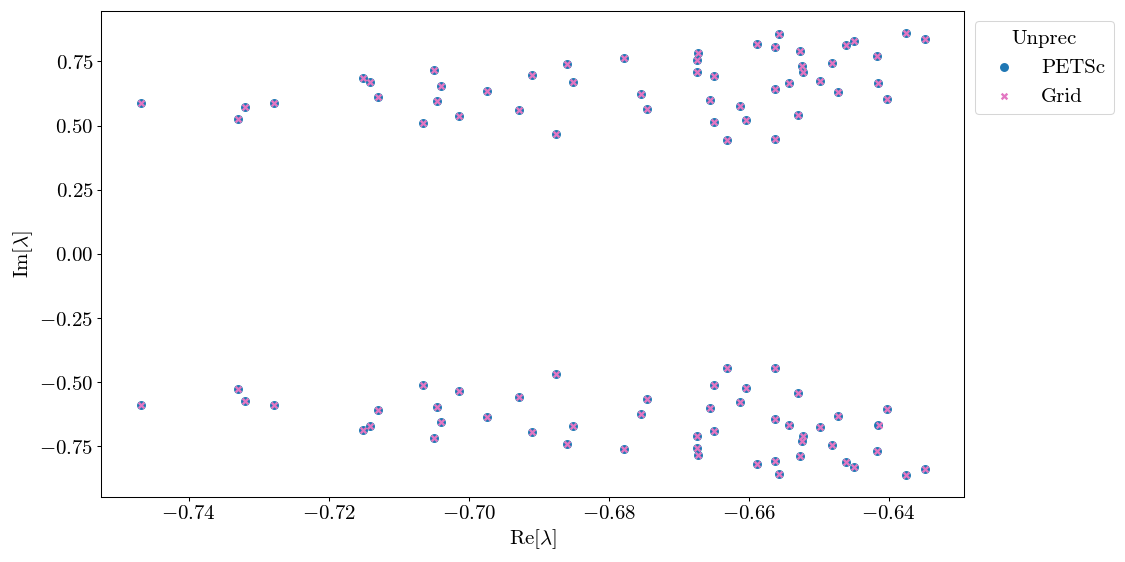

In [49]:
fig, axes = pt.add_subplots()
ax = axes[0]
pt.scatter_1d(np.real(unprec_petsc), np.imag(unprec_petsc), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'PETSc', style = style1)
# pt.scatter_1d(np.real(unprec_grid_evals), np.imag(unprec_grid_evals), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
pt.scatter_1d(np.real(filtered), np.imag(filtered), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
# pt.add_line(ax, val = -0.6415, orientation = 'v')
# pt.add_line(ax, val = -0.641, orientation = 'v')

ax.legend(title = r'Unprec', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
plt.tight_layout()
# ax.set_ylim((1.2, 1.45))

pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/unprec_m0p001.pdf')

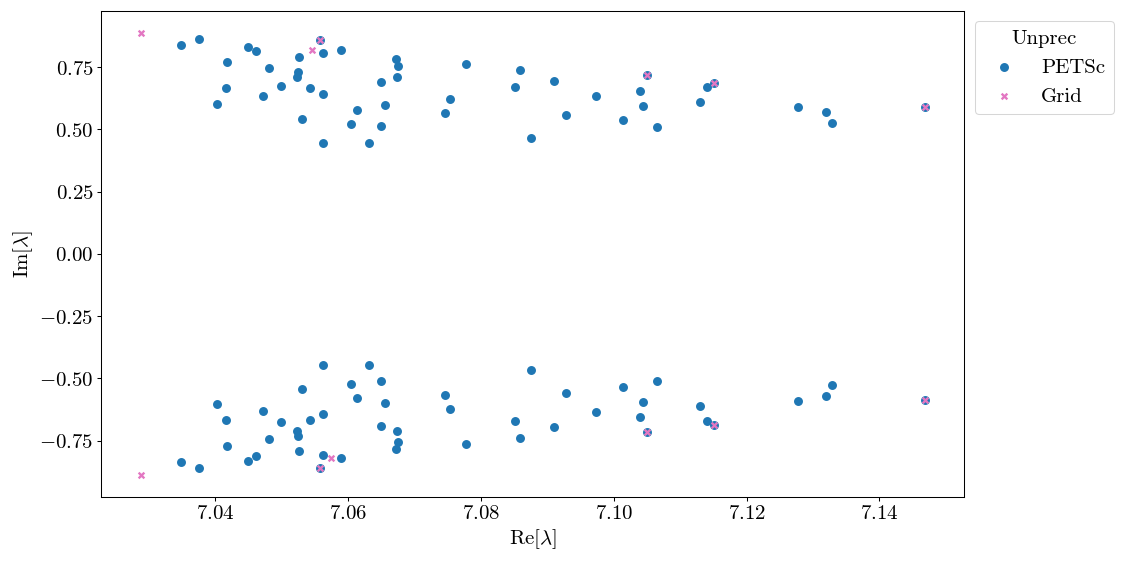

In [50]:
fig, axes = pt.add_subplots()
ax = axes[0]
pt.scatter_1d(np.real(petsc_high), np.imag(petsc_high), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'PETSc', style = style1)
pt.scatter_1d(np.real(grid_high), np.imag(grid_high), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
# pt.scatter_1d(np.real(grid_high), np.imag(grid_high), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], mkr = 'x')
ax.legend(title = r'Unprec', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
plt.tight_layout()
# ax.set_ylim((1.2, 1.45))

# pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/unprec_m0p001.pdf')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

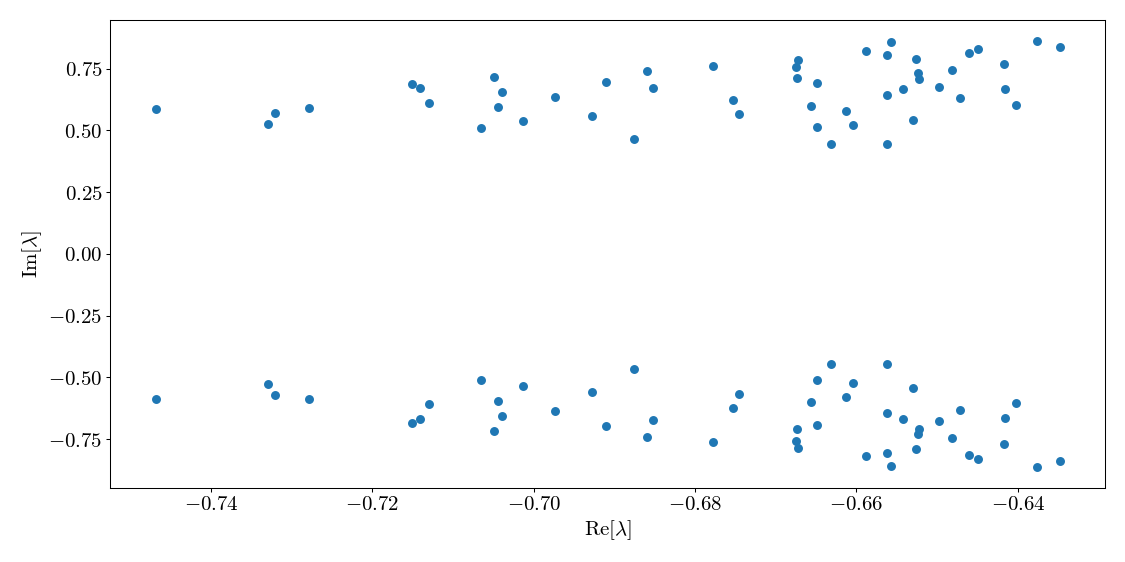

In [51]:
fig, axes = pt.add_subplots()
ax = axes[0]
pt.scatter_1d(np.real(unprec_petsc), np.imag(unprec_petsc), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'PETSc', style = style1)
pt.scatter_1d(np.real(unprec_grid_evals), np.imag(unprec_grid_evals), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
pt.scatter_1d(np.real(petsc_high), np.imag(petsc_high), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], style = style1)
pt.scatter_1d(np.real(grid_high), np.imag(grid_high), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], mkr = 'x')
ax.legend(title = r'Unprec', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
plt.tight_layout()
# ax.set_ylim((1.2, 1.45))

# pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/unprec_m0p001.pdf')